## Machine Learning Algorithms

### Linear Regression and the Objective Function

Before we discuss Machine Learning Models, we need to understand the most basic statistical model: Simple Linear Regression. 
Linear Regression is an approach to model the relationship between an outcome (dependent) variable, and one or more explanatory (independent) variables.
You've probably seen linear regressions with one explanatory variable in mathematics class written as the following: $$y = \alpha + \beta x$$. Economists call $y$ the outcome variable and $x$ the explanatory variable. 

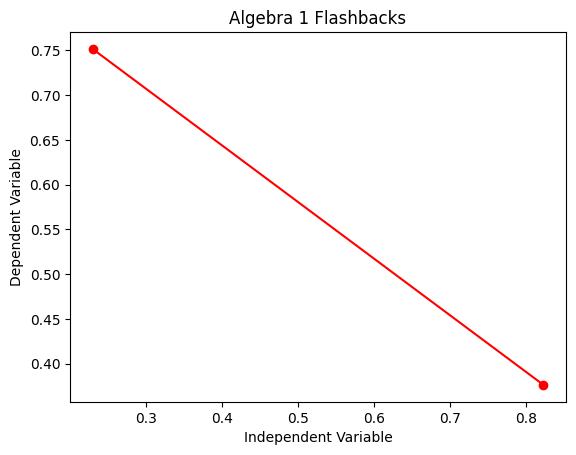

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# generate two random points
x, y = np.random.random(size=(2,2))

# plot the two points
for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')

# add title, y-axis, x-axis labels to the plots
plt.title("Algebra 1 Flashbacks")
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
# show the plot
plt.show()

In economics, we always have more than 2 data points. Thus, it is impossible to find the line connecting our data points (unless they are collinear, which never happens)

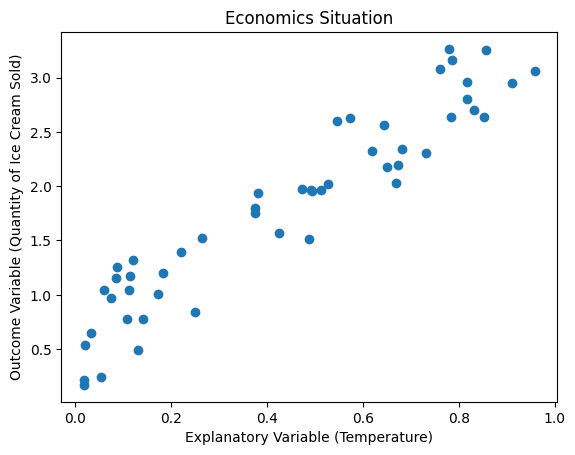

In [ ]:
# generate 50 random points
x = np.random.random(50)
# multiply each point in x by 3, and then add a random value to each point
y = 3 * x + np.random.random(50)
# plot data on a scatter plot
plt.scatter(x, y)

plt.title("Economics Situation")
plt.ylabel("Outcome Variable (Quantity of Ice Cream Sold)")
plt.xlabel("Explanatory Variable (Temperature)")
plt.show()

In mathematics, the linear model you see above was taught as a way to model the line connecting two points. In economics, you should never run a regression with only two points. As such, our goal to find the line that minimizes **the summed square difference between the points and our model (aka sum of squares)**, which you may have heard referred to as a **line of best fit**. Intuitively, it should be the line that's closest to all of the points. But how do we figure out the line of best fit? Below, clearly, orange and blue are further away from the points than green and red. However, is green or red "a better fit"? That's where we calculate the **sum of squares**

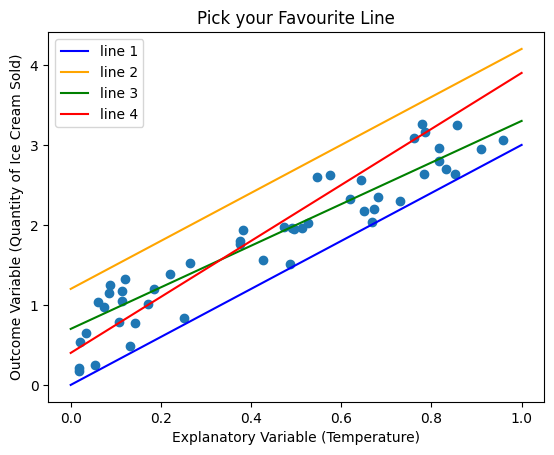

In [ ]:
plt.scatter(x, y)
# plot 4 lines we constructed and label them
plt.plot([0, 1], [0, 3], color = 'blue', label = 'line 1')
plt.plot([0, 1], [1.2, 4.2], color = 'orange', label =  'line 2')
plt.plot([0, 1], [.7, 3.3], color = 'green', label = 'line 3')
plt.plot([0, 1], [.4, 3.9], color = 'red', label = 'line 4')

plt.title("Pick your Favourite Line")
plt.ylabel("Outcome Variable (Quantity of Ice Cream Sold)")
plt.xlabel("Explanatory Variable (Temperature)")
# show legend, which shows labels of lines
plt.legend()
plt.show()

Since it's pretty difficult to draw a line of best fit, even in just 2-D space, we need a more formal way to solve for the coefficient(s) that minimize the sum of squared errors. Mathematically, this problem is expressed as 

$\displaystyle \min \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

where $y_i$ is the actual outcome and $\hat{y}_i$ is the outcome predicted by our model. In the case of simple linear regression, $\hat{y}_i = \alpha + \beta x_i$, so we're trying to find the values of $\alpha, \beta$ that minimize the above sum.
The summation term you see here is called the objective function (or value function, loss function, etc). While this function may change depending on what you are modeling, the concept of the objective function is key in machine learning, since supervised machine learning models (as well as many of the ways to evaluate them) work to minimize the objective function. 

Intercept: 0.58, Slope: 2.79


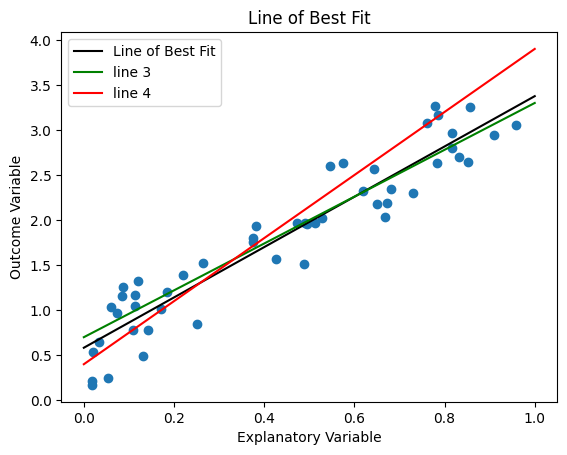

In [ ]:
# import linear regression function
from sklearn.linear_model import LinearRegression
# create linear regression object
lr = LinearRegression()
# fit the data 
lr.fit(x.reshape(-1, 1), y)
s_lr = lr.coef_[0]
int_lr = lr.intercept_
# print out the coefficients from minimizing the sum of squares
print("Intercept: {:.2f}, Slope: {:.2f}".format(int_lr, s_lr))

# generate 100 points between 0 and 1 so we can plot the line
pts = np.linspace(0, 1, 100)
plt.plot(pts, pts*s_lr + int_lr, color = 'black', label = 'Line of Best Fit')
plt.plot([0, 1], [.7, 3.3], color = 'green', label = 'line 3')
plt.plot([0, 1], [.4, 3.9], color = 'red', label = 'line 4')

plt.scatter(x, y)

plt.title("Line of Best Fit")
plt.ylabel("Outcome Variable")
plt.xlabel("Explanatory Variable")
plt.legend()
plt.show()

When we compare the sum of squares for the line of best fit compared to the green and red line, we see that it is much smaller!

In [ ]:
# slope and intercepts for green and red line
s_g = (3.3-.7)/1
int_g = .7
s_r = (3.9-.4)/1
int_r = .4

# calculating sum of squares for each of the 3 lines from the previous graph
ss_bf = np.sum((y - (x*s_lr + int_lr))**2)
ss_g = np.sum((y - (x*s_g + int_g))**2)
ss_r = np.sum((y - (x*s_r + int_r))**2)
print("Sum of Squares")
print("Line of Best Fit: {:.2f}".format(ss_bf))
print("Green Line: {:.2f}".format(ss_g))
print("Red Line: {:.2f}".format(ss_r))

Sum of Squares
Line of Best Fit: 3.98
Green Line: 4.20
Red Line: 6.96


Linear regression can also be used when we have multiple explanatory variables. For example, we can write a linear regression with 3 explanatory variables as $\hat{y} = \beta_0 + \beta_1 x + \beta_2 w + \beta_3 z$. 

Mathematically, our objective function is the same, with some minor caveats.
$\displaystyle \min \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
First, $\hat{y}_i = \beta_0 + \beta_1 x_i + \beta_2 w_i + \beta_3 z_i$. Second, we are now finding the values of $\beta_0,\beta_1, \beta_2, \beta_3$ that minimize the above sum. 

### Applications in Economics: Linear Regression
Linear regression is a powerful tool that has many applications beyond what we just covered. You'll learn much more about linear regression in econometrics, but here are some useful ways to utilize it
1. It's really good at summarizing relationships between many variables linearly. For example, suppose we run a linear regression with ice cream consumption as the outcome variable, and age and temperature as the covariates. The coefficient for age tells us generally, how increases in age are associated with increases in ice cream consumption, while accounting for differences in temperature. Note that this isn't causal, nor is it a perfect model of the world. However, it's a good way to summarize your data in an interpretable way and everyone will understand it. 
2. It's a good benchmark for prediction estimates. Using linear regression helps establish the difficulty of the prediction problem and how well we should expect future algorithms to be able to perform, at least. 


### DGP and Noise

Now that we have a rough idea of how model building works, we want to generalize our understanding to  machine learning more broadly. 

We will start with the DGP, or Data Generating Process. The DGP tells us how our data is "generated" - that is, our beliefs about the mathematical relationships between our variables. In simulations, the DGP is known, but in the real world, we don't know the DGP. However, we can make assumptions, and these assumptions are important for our choice of machine learning model. 
For example, assume that our (simplified) DGP is $Y = 5X$. This tells us that the true relationship between $X$ and $Y$ is linear, and $X$ and $Y$  differ by a factor of 5. 

Statistical noise is variation in our data that reflects how our data deviates from the DGP. For example, in our data, for any $x$ and the corresponding $y$, $5x \neq y$, but $5x$ is close to y, and for the overall dataset, $y=5x$ is close to the actual model we would get if we applied linear regression to our data. In the real world, data is not perfect - there can be measurement error or random events that occur that throw our data off. We want to account for this in our DGPs so we add noise (or error) terms to our DGP. Thus, $Y = 5X + \epsilon$ where $\epsilon$ is a term that reflects our "noise". 

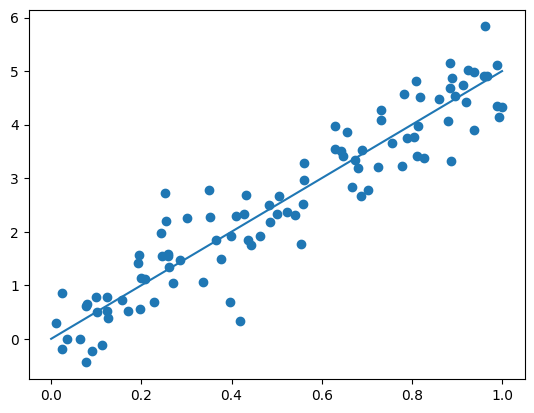

In [ ]:
X = np.random.rand(100)
Y = 5*X + .5 * np.random.normal(size = 100)
plt.scatter(X, Y)
plt.plot(np.linspace(0, 1, 100), 5 * np.linspace(0, 1, 100))

### Applications in Economics: The DGP

The DGP is where we can incorporate our knowledge of economics and situation towards the model. For example, suppose we have wage data, and we want to describe wage as a function of age. We suspect that extremely old workers might receive lower wages because they have less potential, but that older workers also have more experience so they are compensated more. This informs us that a (oversimplified) DGP could be $wage = \alpha + \beta age + \gamma age^2$ and we can estimate this using linear regression. 

### Training and Test Data

#### Motivation

While we obviously want our model to perform well, which oftentimes means giving it as much information as possible to make the best predictions it can, the end goal of modeling is to be able to make accurate predictions when we deploy it into the real world. 

Consequently, when we build our models, we want to ensure that they do well both on our training set and in the real world. However, we cannot test our model on real world data beforehand, so what we do to simulate this is to split our data into two sets, a training set and a test set. Subsequently, when we build our model, we fit it to the training set and then test it on the test set to simulate how our model would perform on "real data".

#### Overfitting

A related reason to split your data into training and test sets is to ensure you are not **overfitting**. Overfitting is when your model fits too closely to your training data and puts too much weight on the noise present in the training set. Here is an example of how you can overfit on the training set based on how you build your model. Note: MSE stands for mean squared error, which is just the sum of squared errors we saw before divided by the number of samples i.e. its a measure of average error. It is one of the many metrics we will be using to evaluate our models. For example, if we know that in our DGP, we only have 5 variables that matter, even though we have 20 in our dataset, we want to avoid using all 20. 

Note: the reason why linear regression, LASSO, and logistic regression (introduced later) are used is because they tend to overfit data less easily than other machine learning methods, especially when the quantity of data is not very high. Also, they're faster to compute. 



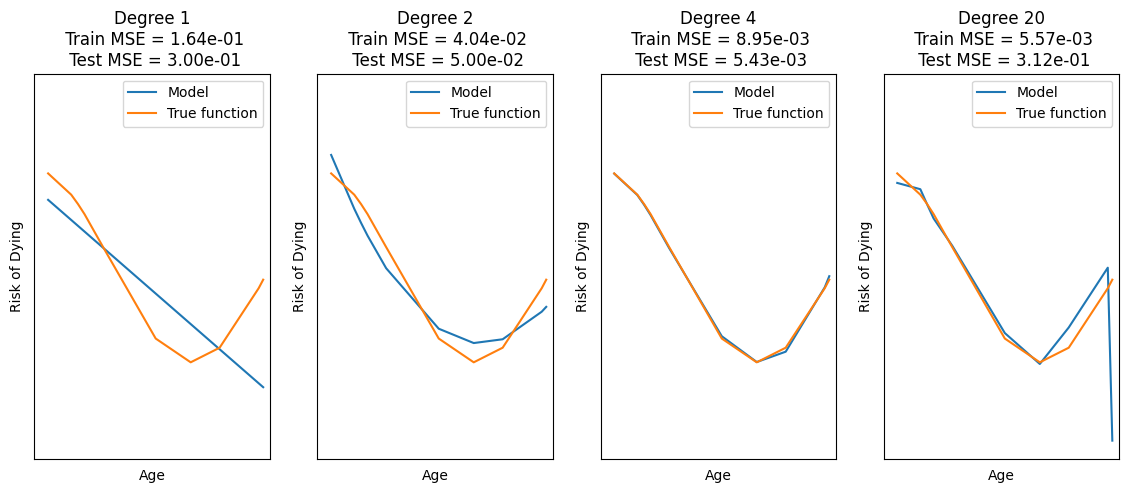

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# true DGP
def true_fun(X):
    return np.cos(1.5*np.pi * X)


n_samples = 50

# how many degrees we will fit up to
degrees = [1, 2, 4, 20]
# generate data based off DGP
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
    # Evaluate the models using crossvalidation
    train_mse = mean_squared_error(lr.predict(X_train_poly), y_train)
    test_mse = mean_squared_error(lr.predict(X_test_poly), y_test)

    plt.plot(sorted(X_test), lr.predict(X_test_poly)[np.argsort(X_test)], label="Model")
    plt.plot(sorted(X_test), true_fun(np.array(sorted(X_test))), label="True function")
    #plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("Age")
    plt.ylabel("Risk of Dying")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\n Train MSE = {:.2e}\n Test MSE = {:.2e}".format(
            degrees[i], train_mse, test_mse,
        )
    )
plt.show()

In the example below, only 5 of our coefficients are non-zero and important for predictive accuracy. Below, we'll demonstrate how other methods improve upon linear regression in predictive accuracy by incorporating only some of the variables. 

In [ ]:
# generate sparse data
from sklearn.datasets import make_regression
x, y, coef = make_regression(n_samples = 1000, n_features = 50, n_informative = 10, n_targets = 1, coef = True, random_state = 42, noise = 3)

# split x, y into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 43)
print("True coefficients of variables")
coef

True coefficients of variables


array([ 0.4870345 ,  0.        ,  0.        ,  0.        , 38.25226374,
        0.        ,  0.        ,  0.        ,  0.        , 91.40492702,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  7.08862258,  0.        ,  0.        ,  0.        ,
        0.        ,  5.35592483,  0.        ,  0.        ,  0.27705054,
        0.        , 86.86737123,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 12.34224137, 94.77549261,  0.        ,
        0.        ,  0.        ,  0.        , 10.79001522,  0.        ])

Assume $\hat{y}_i = \beta_0 + \beta_1 x_i + \beta_2 w_i + \beta_3 z_i$.
One example of a method that improves upon linear regression by selecting only a few variables is LASSO. LASSO incorporates regularization by changing our objective function to the following
$\displaystyle \min \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ s.t. $\sum_{i=1}^3|\beta_i| \leq t_1$, where $t_1$ is some value we choose via cross validation (coming next).
This is called L1 regularization (LASSO). 
L2 regularization is $\displaystyle \min \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ s.t. $\sum_{i=1}^3|\beta_i^2| \leq t_2$ (Ridge). 
By limiting the value of the coefficients, regularization reduces coefficient magnitude. In L1 regularization, it even forces some coefficients to be 0 (our goal). Now, let's compare linear regression and LASSO


In [ ]:
from sklearn.linear_model import LassoCV
lr = LinearRegression()
lr.fit(x_train, y_train)
# use cross validation to pick optimal penalty
ls = LassoCV(cv = 5)
ls.fit(x_train, y_train)

print("MSE for Linear Regression (training data) {:.2f}".format(mean_squared_error(y_train, lr.predict(x_train))))
print("MSE for LASSO (training data) {:.2f}".format(mean_squared_error(y_train, ls.predict(x_train))))
print("MSE for Linear Regression (test data) {:.2f}".format(mean_squared_error(y_test, lr.predict(x_test))))
print("MSE for LASSO (test data) {:.2f}".format(mean_squared_error(y_test, ls.predict(x_test))))

MSE for Linear Regression (training data) 8.40
MSE for LASSO (training data) 8.66
MSE for Linear Regression (test data) 8.21
MSE for LASSO (test data) 8.08


We see above that even though LASSO peforms worse in training, it performs better in testing. This is a case where we should not use linear regression!


#### Cross Validation (CV)

As you saw above, we used cross validation to choose the value of $t_1$ in LASSO (and we would also do the same for $t_2$ for Ridge). $t_1$ and $t_2$ are what we call hyperparameters, parts of the model that affect its performance that cannot be found deterministically (i.e. using a formula like $\beta$ for linear regression). We have to find them using trial and error (non-deterministically). While we cannot determine the best hyperparameters exactly, we want to find the sufficiently good hyperparameters given our current data. 

To do this, we use CV, specifically the most common technique which is known as k-fold cross validation. What this type of CV does is it first breaks our training set into k subsets e.g. if k=5 then we'd have 5 even subsets of our training data. It then selects one of the 5 folds to be a 'test set' and trains the model on the remaining 4. It records the test accuracy and then does this again for each of the other 4 folds. Once it has completed this for all k folds, it selects the model with the highest accuracy and uses that model's value for $t_1$ to refit on the data, producing the best model under those conditions. 

Since cross validation is an iterative process, meaning it repeats based on the k you select, it is important to balance testing on a large range of splits (large k) to capture more information from your data and training your model in a reasonable amount of time since each additional k increases training time exponentially. 

![](./cv.png)

### Applications in Economics: Regularization

Knowing when to use LASSO requires understanding the underlying economic situation and how it relates to the DGP. For example, suppose we have a dataset with many characteristics about an individual (age, height, weight, educational background, occupation, years of experience, where they live, number of kids etc) and we wanted to predict their wage. Economic theory tells us that more productive workers have higher wages; some variables we believe could be strongly related to productivity are occupation and years of experience. Converselely, variations in someone's height or weight are likely unrelated to productivity and thus unlikely to be agood predictor of wages. In this case, we would want to choose some form of regularization to prevent the algorithm from overfitting and attributing too much effect to height/weight. It seems that since many of the variables could have small but non-zero magnitudes, we choose L2 regularization (Ridge).

You can compare LASSO with Ridge by comparing predictive performance. It may also be helpful to motivate an understanding through economic intuition to justify the choice of model. 

### Logistic Regression

Starting with logistic regression, we will be focusing less on the math behind these algorithms and more on the use and applications (if you're curious about the math we'd be happy to talk about it outside of cohort meetings). 

Logistic regression is a linear model (meaning we combine variables additively) with regularization that used in classification tasks where you have two outcomes, 0 and 1. An example of this would be a spam mail classifier (0 being not spam and 1 being spam) or predicting the likelihood of default (0 no default and 1 default). Logistic regression models themselves would return a 0 or 1 for each observation, but in reality what the algorithm is doing is it predicts the probability of that observation being 0/1 and based on which class it is more likely to be in it then assigns the observation to 0 or 1. 

Here's a visualization of logit below:
![](./logit.png)

In [ ]:
titanic = pd.read_csv('./train.csv')
titanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic.dropna(inplace=True)

# pre-processing + feature engineering
processing = titanic.copy()
#processing['embarked_code'] = processing['Embarked'].astype('category').cat.codes
processing['l1'] = processing['Cabin'].str[0]
processing['l2'] = processing['Cabin'].str[1:].str.extract(r'([A-Z])')

def get_right(l,r):
    if pd.isna(r):
        return l
    elif l==r:
        return l
    else:
        return r

processing['cabin_level'] = processing.apply(lambda x: get_right(x['l1'],x['l2']),axis=1)
processing['cabin_level'] = processing['cabin_level'].astype('category').cat.codes
processing.drop('l2',axis=1,inplace=True)

processing['l1'] = processing['Cabin'].str.extract(r'([0-9]{1,3})')

processing.dropna(inplace=True)

processing['l2'] = processing.apply(lambda row: row['Cabin'][len(row['l1'])+1:], axis=1)

processing['l2'] = processing['l2'].str.extract(r'([0-9]{1,3})')
def get_left(l,r):
    return l
processing['cabin_num'] = processing.apply(lambda x: get_left(x['l1'],x['l2']),axis=1)

processing = processing.drop(['SibSp','Embarked','Cabin','l1','l2'],axis=1)

# if I were actually doing the competition, I would create a function to engineer a dependent/not dependent dummy based on age and Sibling/Spouse and Parch (dependent vs paraent) data

dummy_col = ['Sex']
processing = pd.get_dummies(processing, columns=dummy_col, drop_first=False)
processing.shape


(179, 9)

<AxesSubplot:>

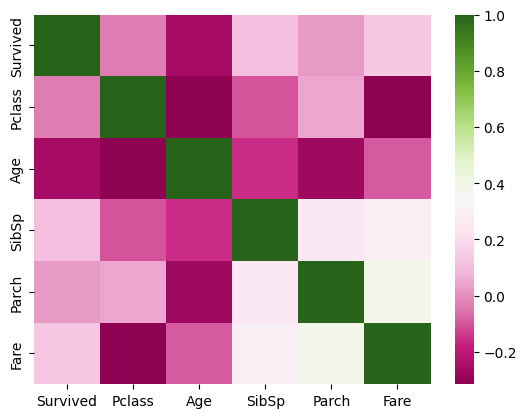

In [ ]:
corr = titanic.corr()
sns.heatmap(corr, cmap="PiYG")

In [ ]:
X = processing.drop('Survived',axis=1)
y = processing['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train,y_train)
logit_pred = logit.predict(X_test)

results = pd.DataFrame({'Predictions':logit_pred,'True':y_test})
results['correct'] = results['True'] - results['Predictions']

accuracy = results[results['correct']==0].shape[0] / results.shape[0]
print('Accuracy: {}'.format(round(accuracy,2)))
results

Accuracy: 0.72
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predictions,True,correct
515,0,0,0
853,1,1,0
102,1,0,-1
62,0,0,0
487,0,0,0
429,0,1,1
599,0,1,1
6,0,0,0
340,1,1,0
498,1,0,-1


#### Applications of Logit in Economics:

Similarly to linear regression, logit is a great tool for summarizing the relationship between our predictors and the outcome we're trying to measure. It is also fairly easy to implement and easily interpretable, so it provides a decent baseline for comparing against more flexible classifiers. 

Examples of applications of logit include predicting whether farmers chose to use fertilizer or not, if industries are collusive, or the likelihood of recidivism. 

### Trees
Next, I'll show an example of where linear regression/logistic regression fails and when we want to use alternative machine learning methods. Let's suppose we want to predict the color of any point in the graph below, given it's x and y coordinate. 

In [ ]:
x1, y1 = np.random.rand(1000) + np.random.normal(0, .1, 1000), np.random.rand(1000) + np.random.normal(0, .1, 1000)
x2, y2 = -1 * np.random.rand(1000)+ np.random.normal(0, .1, 1000), np.random.rand(1000) + np.random.normal(0, .1, 1000)
x3, y3 = -1 * np.random.rand(1000)+ np.random.normal(0, .1, 1000), -1 * np.random.rand(1000) + np.random.normal(0, .1, 1000)
x4, y4 = np.random.rand(1000)+ np.random.normal(0, .1, 1000), -1 * np.random.rand(1000) + np.random.normal(0, .1, 1000)

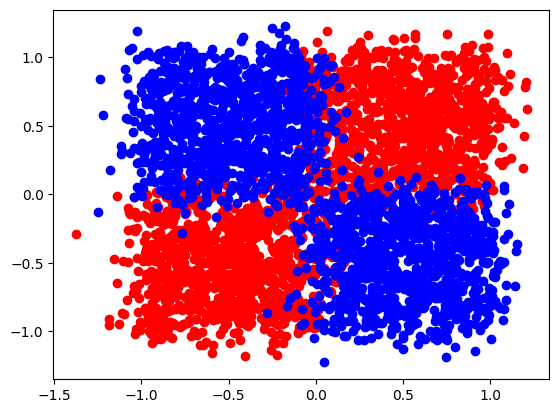

In [ ]:
x_g1, y_g1 = np.concatenate((x1, x3)), np.concatenate((y1, y3))
x_g2, y_g2 = np.concatenate((x2, x4)), np.concatenate((y2, y4))
plt.scatter(x_g1, y_g1, color = 'red')
plt.scatter(x_g2, y_g2, color = 'blue')

Just looking at the picture, it seems like a pretty good way to determine the color is to look at what quadrant the points are in. However, using logistic regression regression would produce disastrous results, as the DGP is non-linear. Logistic regression is a linear model, so it performs poorly on non-linear data.

Note: non-linearity means that additive combinations of the variables are not good for predicting the outcome. For example, suppose we represent the color blue as 1 and red as 0. Notice how if x\*y > 0 (first and third quadrants), then the data is almost always red (our outcome f(x, y) = 0). However, x\*y is a non-linear way of combining variables.

I will compare the performance of logistic regression with another method, which is called a decision tree. 

Text(0.5, 1.0, 'Predicted Values (logit)')

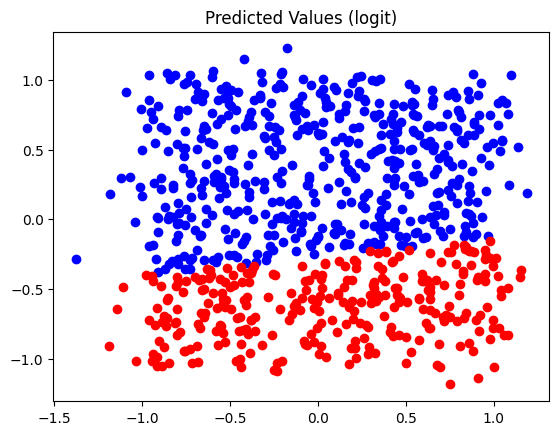

In [ ]:
df = pd.DataFrame(columns = ['x', 'y', 'outcome'])
df['x'] = np.concatenate((x_g1, x_g2))
df['y'] = np.concatenate((y_g1, y_g2))
df['outcome'] = np.concatenate((np.zeros(2000), np.ones(2000)))

X_train2, X_test2, y_train2, y_test2 = train_test_split(df[['x', 'y']], df['outcome'], test_size = 0.2, random_state = 43)

from sklearn.linear_model import LogisticRegression
logit2 = LogisticRegression()
logit2.fit(X_train2,y_train2)
logit_predict = logit2.predict(X_test2)
plt.scatter(X_test2[logit_predict == 1]['x'], X_test2[logit_predict == 1]['y'], color = 'blue')
plt.scatter(X_test2[logit_predict == 0]['x'], X_test2[logit_predict == 0]['y'], color = 'red')
plt.title('Predicted Values (logit)')

Text(0.5, 1.0, 'Actual Values')

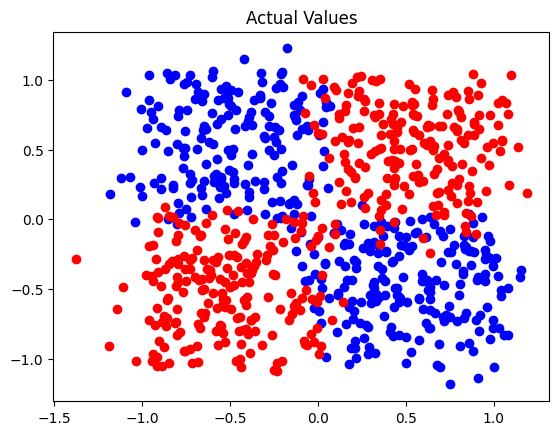

In [ ]:
plt.scatter(X_test2[y_test2 == 1]['x'], X_test2[y_test2 == 1]['y'], color = 'blue')
plt.scatter(X_test2[y_test2 == 0]['x'], X_test2[y_test2 == 0]['y'], color = 'red')
plt.title('Actual Values')

Text(0.5, 1.0, 'Predicted Values (tree)')

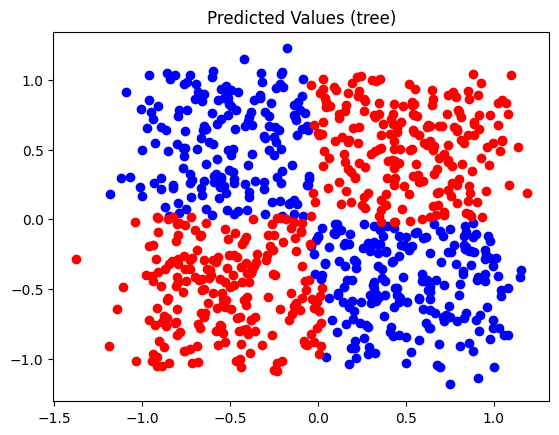

In [ ]:
from sklearn import tree
# max_features, max_depth for trees are hyperparameters
clf = tree.DecisionTreeClassifier(max_features = 3, max_depth = 3)
clf = clf.fit(X_train2, y_train2)
tree_predict = clf.predict(X_test2)
plt.scatter(X_test2[tree_predict == 1]['x'], X_test2[tree_predict == 1]['y'], color = 'blue')
plt.scatter(X_test2[tree_predict == 0]['x'], X_test2[tree_predict == 0]['y'], color = 'red')
plt.title('Predicted Values (tree)')

[Text(0.5, 0.875, 'y <= -0.452\ngini = 0.5\nsamples = 3200\nvalue = [1592, 1608]'),
 Text(0.25, 0.625, 'x <= 0.032\ngini = 0.498\nsamples = 875\nvalue = [466, 409]'),
 Text(0.125, 0.375, 'x <= -0.084\ngini = 0.07\nsamples = 470\nvalue = [453, 17]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 432\nvalue = [427, 5]'),
 Text(0.1875, 0.125, 'gini = 0.432\nsamples = 38\nvalue = [26, 12]'),
 Text(0.375, 0.375, 'x <= 0.116\ngini = 0.062\nsamples = 405\nvalue = [13, 392]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 30\nvalue = [9, 21]'),
 Text(0.4375, 0.125, 'gini = 0.021\nsamples = 375\nvalue = [4, 371]'),
 Text(0.75, 0.625, 'x <= -0.042\ngini = 0.5\nsamples = 2325\nvalue = [1126, 1199]'),
 Text(0.625, 0.375, 'y <= 0.021\ngini = 0.417\nsamples = 1099\nvalue = [326, 773]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 331\nvalue = [285, 46]'),
 Text(0.6875, 0.125, 'gini = 0.101\nsamples = 768\nvalue = [41, 727]'),
 Text(0.875, 0.375, 'y <= -0.024\ngini = 0.453\nsamples = 1226\nvalue = [

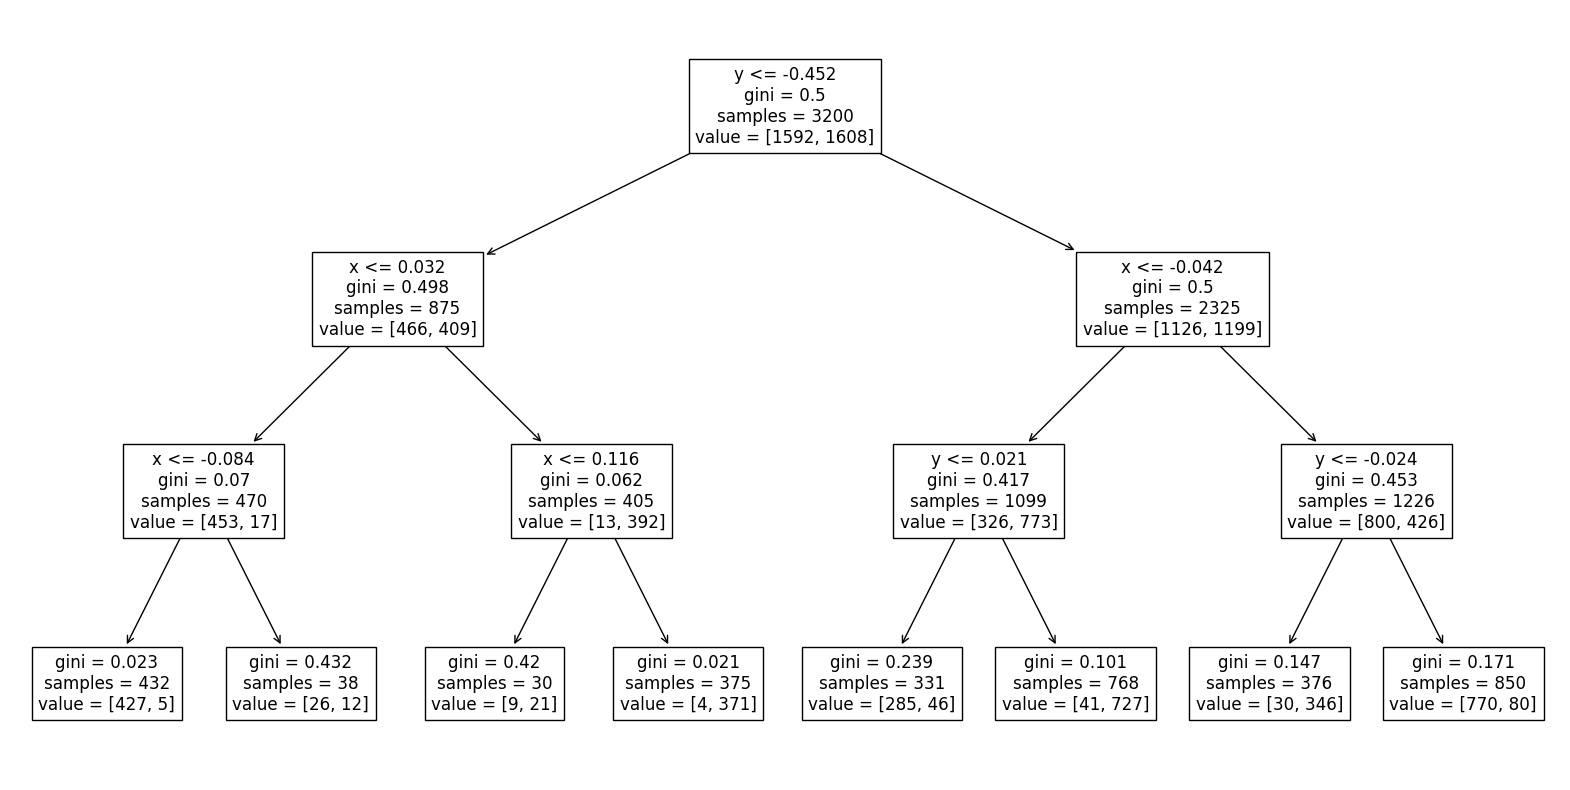

In [ ]:
plt.figure(figsize = (20, 10))
tree.plot_tree(clf, feature_names = ['x', 'y'])

### Ensemble Learning - Random Forests & Boosting

Ensemble learning refers to algorithms in machine learning that combine the predictions of two or more models to increase predictive performance. We will be focusing on two classes of ensemble learning methods, bagging boosting, and their respective algorithms, Random Forest and Boosting, both of which combine trees.

#### Bagging & RF

Bagging is short for bootstrap aggregation. In simple terms, this means that the model trains a bunch (or ensemble) of full trees at the same time (i.e. in parallel), each on different samples of the dataset. The final prediction is then made by combining the predictions of the individual trees, usually via voting or averaging. This is an effective technique because while individually, trees are very prone to overfitting/being unecessarily complex (see example above), combining the results of many trees reduces the impact of overfitting. 

#### Boosting

Boosting differs from bagging and RF in that it trains each tree sequentially, with each tree being fairly simple (think a tree with one or two branches or even a stump). Most importantly, with each subsequent tree, the learning algorithm focuses more (puts higher weights) on the observations that were misclassified by the previous tree. This way, when we take a **weighted** average of the individual trees' predictions, we are (in theory) getting better prediction for those more unusual observations. 


### Applications in Economics
Random Forests and Gradient Boosting algorithms are especially powerfully when we have large amounts of data (think tens/hundreds of covariates, thousands of observations). When we have so many covariates, it is likely that the true DGP is some complex unknown function - however, using Random Forests and Gradient Boosting allows us to closely approximate the outcome of that DGP. The "algorithm" produced by Random Forests and Gradient Boosting isn't exactly the DGP, but it mimics it closely. 

An example of when this is used is for predicting loan default rates. One of the areas where America is most data-rich is financial data, and banks use this information when deciding whether to give someone a loan. These datasets have hundreds of columns - information like the number of missed credit card payments over the past year or the number of credit card transactions you've made - which makes Random Forests and Gradient Boosting algorithms especially well suited.

### More Mathematically Rigorous Models

Currently, some of the most popular machine learning models used in areas like computer vision and natural language processing (NLP) are **Neural Networks** and a related NN architecture, **Transformers**, respectively. These models are highly sophisticated and require significantly more math to understand compared to prior models we've discussed. However, since they are extremely powerful and useful techniques, we believe we should mention them for when you encounter these models in the future or explore them on your own. 

## Evaluating Machine Learning Models

Now that we know how to use these machine learning models, how do we evaluate how they're performing? We will now cover the different metrics people use to evaluate the peformance of these models. 

### Hyperparameter Tuning

We've already encountered some examples of hyperparameter tuning e.g. $t_1$ for LASSO and max_depth for decision trees. Both of these use cross-validation to tune these hyperparameters. Today we'll be talking about more general functions for hyperparameter tuning, `gridsearchcv` and `randomsearchcv`.

**gridsearchcv**

When we perform hyperparameter tuning, you can think of this process as trying out different values for our hyperparameters to see which ones result in the best model. This is referred to as "searching", since we're searching through the set of all possible hyperparameter values to find the optimal combination. Unfortunately for us, it is extremely difficult to know the 'score' of the model for every hyperparameter combination. As a result, we are left to guess at what these values are and hope that we eventually find them.

This is essentially what `gridsearchcv` does. For a specific set of hyperparameters, for example the number of estimators and depth of each tree in a random forest model, we provide the function with a set of values to search through and it tries every combination and spits back out the model with the combination that scored the highest. Continuing from the earlier example, a potential set of inputs would be n_estimators = [10, 50, 100, 200] and max_depth = [3, 10, 20, 40]. Gridsearch would then go through every combination of these two sets of values and find which one was optimal.

As you can probably imagine, this process is extremely inefficient, which is why we will be talking about a  better version of this method in the next section.

**randomsearchcv**

Instead of providing a specific set of values for the function to try out, with `randomsearchcv` we instead input a distribution for each hyperparameter from which the function will randomly sample values. Essentially, we provide a range of values and this function will randomly select combinations of these values to find the optimal. 

The theoretical reasonfor why this works is that generally speaking, hyperparameters are not equally important. This means that our algorithm will spend more time tuning the important hyperparameter and less time on the unimportant ones, improving exploratory power. 

### Bias and Variance
Bias and variance are two terms you often see used a lot in econometrics, statistics and machine learning.  I find that the concepts are best illustrated by the following image.
![](./bias_variance.png)

The simple non-mathematical definition is:
**Bias**: it's the difference between average predictions and true values.
**Variance**: it's the variability of our predictions, i.e. how spread out your model predictions are.

We can improve bias and variance separately by using different models. Regression models are generally high bias, low variance while trees/forests are low bias, high variance. The intuition is trees/forests can fit a wide variety of DGPs well (hence low bias) but it tends to overfit which makes it high variance. Regression models cannot accurately model/predict a wide variety of DGPs well but it has low variance because it is a very simple model. 

Notice the bias-variance tradeoff. As we increase the complexity of our algorithm (linear regression -> forests/trees) we reduce bias but increase variance through the risk of overfitting. The researcher's goal should be to find a middle ground. 

Thank you https://datascience.stackexchange.com/questions/80157/what-are-bias-and-variance-in-machine-learning for the graphics

### Classification - The Confusion Matrix

Evaluating binary classification tasks is more difficult than regression tasks since you can't just take the difference between the predicted and actual values to get a general idea of model performance. Specifically, classification models' predictions can be put into 4 categories: True Positive (TP), False Negative (FN), False Positive (FP), True Negative (TN). These are typically placed in a table called the **confusion matrix**:

![](./confusion_matrix.png)
P = TP + FN, N = TN + FP, PP = TP + FP, PN = TN + FN

Using these four categories, we can construct metrics which describe how the model performs in various ways.
The most straightforward metric is *accuracy*, which is calculated as $\displaystyle \frac{\text{TP}+\text{TN}}{\text{P}+\text{N}}$. This is the two categories where the model predicted the class correctly, so either predicting positives as positive or negatives as negative, over the total number of observations. For example, if the model makes 7 correct predictions and 3 incorrect ones, the overall accuracy rate is 70%. However, notice that this doesn't take into account whether the correct predictions were TP/TN, or whether the false predictions were FP/FN.

Two other important and related metrics are *precision* and *recall*. 

Precision is equal to $\displaystyle \frac{\text{TP}}{\text{TP}+\text{FP}}$, the fraction of predicted positives we correctly classified as positive, while recall (aka sensitivity) is equal to $\displaystyle \frac{\text{TP}}{\text{TP}+\text{FN}}$, the fraction of actual positives we correctly classified as positive. 



- can calculate precision/recall from above, describe tpr/fpr
- typically interpret as a rate (fpr = fp/(fp+tn))
- describe f1 score - combines precision recall into one metric

Below we have an example of how you can generate a confusion matrix, and obtain summary statstics about how our classification algorithm performed

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       408
         1.0       0.93      0.91      0.92       392

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



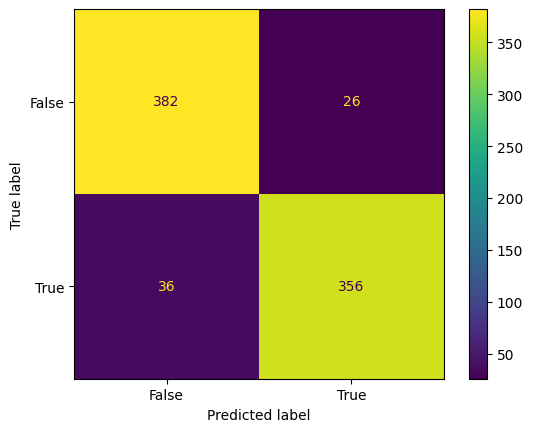

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
 
print(classification_report(y_test2, tree_predict))

confusion_matrix = metrics.confusion_matrix(y_test2, tree_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### AUC/ROC

The ROC curve plots the TPR against the FPR by finding the maximum TPR, assuming a certain FPR (as the false positive rate is allowed to increase, so is the true positive rate). Calculating it requires the model to output "the probabilistic likelihood" our input corresponds to a particular output class. The AUC curve is the area under the ROC curve (integral) - it is bounded below by 0 and above by 1. 
Here are some visuals that explain what it means to have different AUC values. Threshold is the probability the model says that data point belongs to the positive class (y = 1). The red curve is the distribution of the threshold scores for y=1, the green curve is the distribution for y = 0. 
![](./auc1.png)
![](./auc7.png)
![](./auc5.png)
![](./auc0.png)


Check out this article for the used figures and further explanation: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
**Appendix:** Graphing ROC curve
1. Sort probabilities for positive class by descending order
2. Move down the list (lower the threshold), process one instance at a time
3. Calculate the true positive rate (TPR) and false positive rate (FPR) as we go

### Balance/Calibration

Calibration is another measure of algorithm performance. It measures whether the probablity of an event occuring, as predicted by the algorithm, equals reality. For example, if the algorithm predicts that for a sample of customers, 20% of them will default on their loans, and 20% of them do default on their loans, the algorithm is well-calibrated (note that it doesn't have to predict the "right" 20%). Normally, we examine calibration by taking subsections of our data (0-10%, 10-20%, etc is one example) and examining whether the algorithm is well-calibrated for each of these groups. 

Balance is defined as the distribution of predictions conditional on outcomes. Suppose we have data from two groups that differ by some characteristic (wealth, location of residence, etc). We observe an outcome (loan default) for each individual in each group. The probability of default or empirically, FPR, should not differ between the individuals who in reality, do not default (y = 1) in group 1 and group 2. This is called balance for the positive class. The same thing for y = 0 is balance for the negative class (FNR). 

There's a paper by Professor Sendhil Mullainathan (Inherent Trade-Offs in the Fair Determination of Risk Scores) that proves it is impossible for any prediction algorithm to be perfectly balanced and well-calibrated. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f36f187-e4c0-43eb-9741-7f08ff3a54db' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>